In [1]:
import pandas as pd
df = pd.read_excel('Downloads/walmart Retail Data.xlsx')
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


C:\Users\aksha\AppData\Local\Temp\ipykernel_6372\4262120360.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


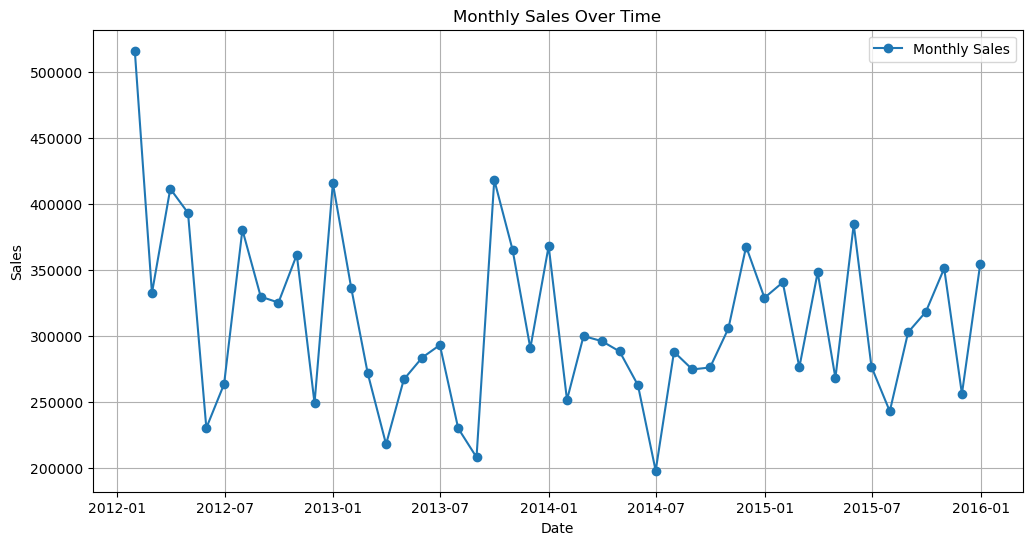

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df['Sales'])
# H0 : It is not stationary
# H1 : Is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print ("strong evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against nll hypothesis, time series has a unit root, indicating it is not stationary")

adfuller_test(df['Sales'])

ADF Test Statistic : -88.37214147310665
p-value : 0.0
#Lags Used : 0
Number of observations used : 8398
strong evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary


In [5]:
import sys
!{sys.executable} -m pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from pmdarima import auto_arima

In [7]:
from pmdarima import auto_arima

arima_model = auto_arima(monthly_sales,
                         seasonal=False,
                         m=12,
                         trace=True,
                         suppress_warnings=True,
                         stepwise=True)


print(arima_model.summary())


C:\Users\aksha\AppData\Roaming\Python\Python312\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1354.229, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1227.790, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1325.102, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1209.472, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1211.444, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1212.275, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1319.597, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1207.085, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1206.104, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1200.925, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1204.039, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.052 seconds
                               S

C:\Users\aksha\AppData\Local\Temp\ipykernel_6372\1320775567.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1], periods=n_periods + 1, freq='M')[1:]


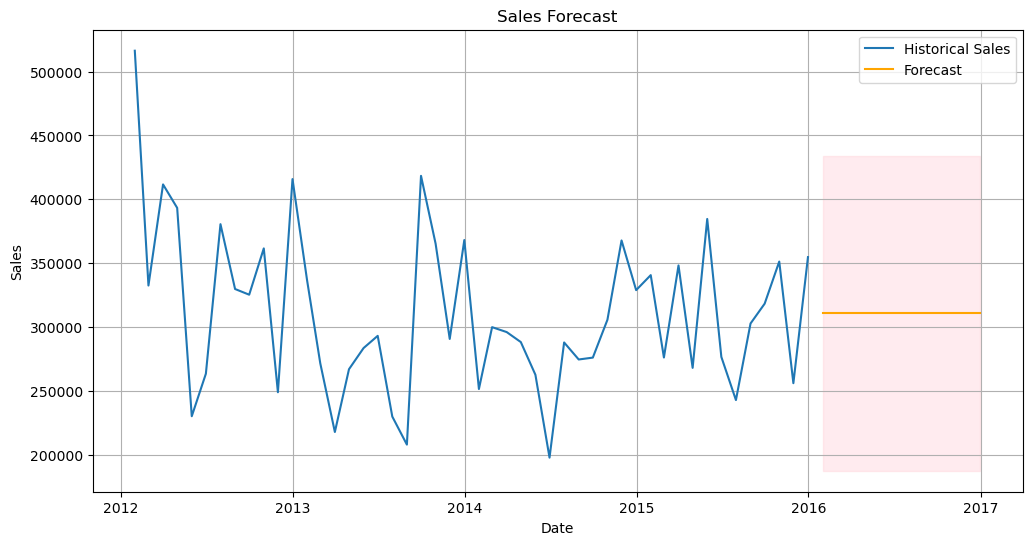

In [9]:
n_periods = 12
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)


forecast_index = pd.date_range(monthly_sales.index[-1], periods=n_periods + 1, freq='M')[1:]
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


train = monthly_sales[:-12]
test = monthly_sales[-12:]

arima_model.fit(train)

test_forecast = arima_model.predict(n_periods=len(test))


mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 39611.43325
RMSE: 44015.57383047484


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aksha\AppData\Local\Temp\ipykernel_6372\3034338527.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1], periods=12, freq='M')


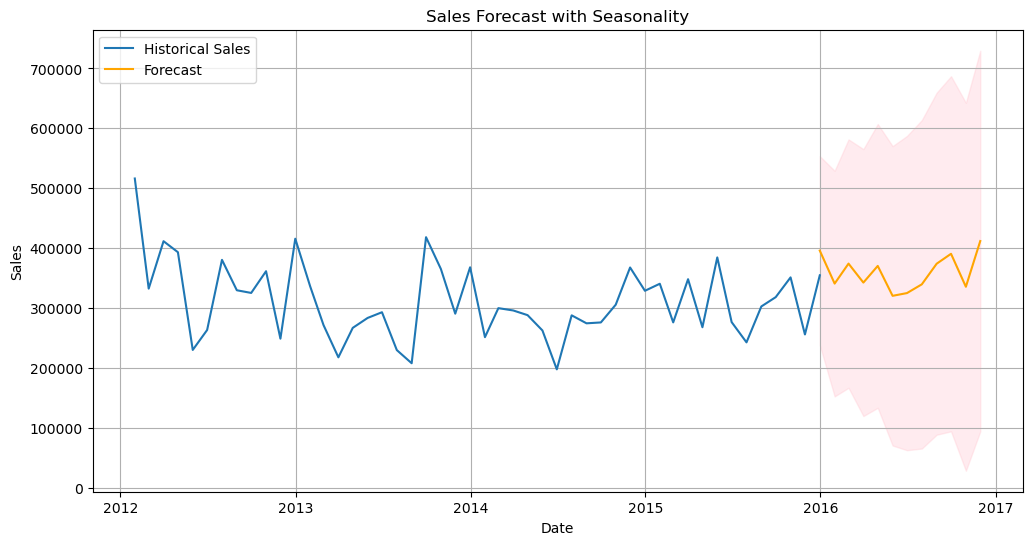

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(monthly_sales,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit()


forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_sales.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df['Cost'] = df['Sales'] - df['Profit']

In [18]:
X = df[['Cost']]
y = df['Profit']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1520090.0573739551
R-squared: 0.03119488202950882
